# Clustering
This script requires a distance and a connectivity matrix generated by a code clone detector.

/home/fabius/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 4 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


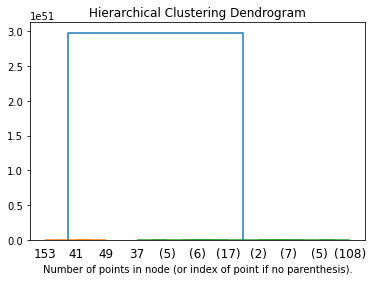

In [2]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt
import numpy as np


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


with open('distance.csv', 'r') as f:
    files = f.readline().split()
    matrix = np.array([[float(num) for num in line.split(',')] for line in f])

with open('connectivity.csv', 'r') as f:
    connectivity = np.array([[int(num) for num in line.split(',')] for line in f])

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, connectivity=connectivity).fit(matrix)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
